<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

Project Overview

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

The dataset contains 1044 instances and 32 variables (most of which binary and categorical). It consists of 2 other datasets. The first provides data for students enrolled in Portuguese class. The second describes students enrolled in a math course. There is overlap between the datasets, that is some students attend both classes.

**Build an NN model for classifying whether a student has alcohol consumption problem.**

Criteria:	Meet Expectations

Neural Network:	Mengimplementasikan NN dengan Tensorflow untuk membuat Klasifikasi

Preprocessing:	Student Melakukan Preproses Dataset Sebelum Membuat Model.

Apakah Kode Berjalan Tanpa Ada Error?:	Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

# Library

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# EDA

In [194]:
import pandas as pd
studentmat = pd.read_csv("dataset/student-mat.csv")
studentmat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [195]:
studentpor = pd.read_csv("dataset/student-por.csv")
studentpor

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [196]:
type(studentpor)

pandas.core.frame.DataFrame

In [197]:
studentmat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [198]:
data = pd.concat([studentmat, studentpor], ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [199]:
data.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [201]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [202]:
obj_col = data.select_dtypes(['object']).columns
data[obj_col] = data[obj_col].apply(lambda x: pd.factorize(x)[0]) #Convert object data to int (decode)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1044 non-null   int64
 1   sex         1044 non-null   int64
 2   age         1044 non-null   int64
 3   address     1044 non-null   int64
 4   famsize     1044 non-null   int64
 5   Pstatus     1044 non-null   int64
 6   Medu        1044 non-null   int64
 7   Fedu        1044 non-null   int64
 8   Mjob        1044 non-null   int64
 9   Fjob        1044 non-null   int64
 10  reason      1044 non-null   int64
 11  guardian    1044 non-null   int64
 12  traveltime  1044 non-null   int64
 13  studytime   1044 non-null   int64
 14  failures    1044 non-null   int64
 15  schoolsup   1044 non-null   int64
 16  famsup      1044 non-null   int64
 17  paid        1044 non-null   int64
 18  activities  1044 non-null   int64
 19  nursery     1044 non-null   int64
 20  higher      1044 non-null   in

In [203]:
# Combine day alcohol and week alcohol
data['all_day_in_week_alc']= data['Dalc']+data['Walc']
data['all_day_in_week_alc'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: all_day_in_week_alc, dtype: int64

In [204]:
data['all_day_in_week_alc'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: all_day_in_week_alc, dtype: int64

In [205]:
data['ave_grade'] = round((data.G1 + data.G2 + data.G3)/3, 2)

0    850
1    194
Name: alcohol_consumption_problem, dtype: int64
0    0.814176
1    0.185824
Name: alcohol_consumption_problem, dtype: float64


Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

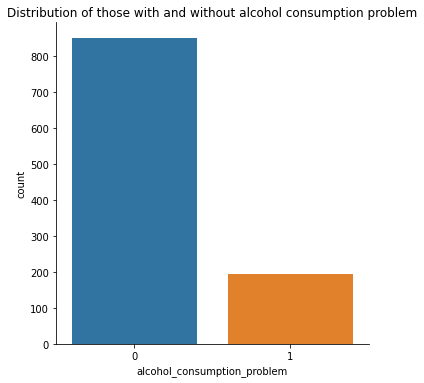

In [206]:
# thresshold for student with alcohol consumption problem is > 5
data['alcohol_consumption_problem'] = [0 if x <= 5 else 1 for x in data['all_day_in_week_alc']] 
        
print(data['alcohol_consumption_problem'].value_counts())
print(data['alcohol_consumption_problem'].value_counts(normalize = True))

sns.catplot(x="alcohol_consumption_problem", kind="count", data=data)
plt.title('Distribution of those with and without alcohol consumption problem')

In [207]:
# Correlation alcohol consumption problem with other features
data.corrwith(data['alcohol_consumption_problem']).sort_values(ascending=False)

alcohol_consumption_problem    1.000000
all_day_in_week_alc            0.815198
Dalc                           0.765071
Walc                           0.718573
goout                          0.330711
sex                            0.312146
failures                       0.149118
freetime                       0.131313
absences                       0.118481
health                         0.106591
higher                         0.101075
traveltime                     0.099463
age                            0.097649
address                        0.077611
nursery                        0.074853
famsize                        0.071077
schoolsup                      0.047370
guardian                       0.039138
paid                           0.024870
school                         0.019389
Pstatus                        0.019115
Fjob                           0.016477
Mjob                           0.015064
internet                       0.014103
activities                     0.010417


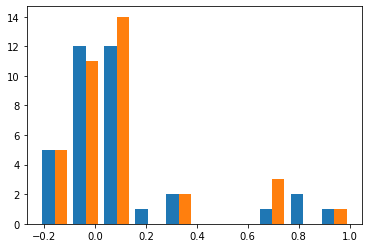

In [208]:
# Comparing Correlation 

plt.hist([data.corrwith(data['alcohol_consumption_problem']).values, 
          data.corrwith(data['alcohol_consumption_problem'], method='spearman').values])
plt.show()

In [209]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,all_day_in_week_alc,ave_grade,alcohol_consumption_problem
0,0,0,18,0,0,0,4,4,0,0,...,1,1,3,6,5,6,6,2,5.67,0
1,0,0,17,0,0,1,1,1,0,1,...,1,1,3,4,5,5,6,2,5.33,0
2,0,0,15,0,1,1,1,1,0,1,...,2,3,3,10,7,8,10,5,8.33,0
3,0,0,15,0,0,1,4,2,1,2,...,1,1,5,2,15,14,15,2,14.67,0
4,0,0,16,0,0,1,3,3,2,1,...,1,2,5,4,6,10,10,3,8.67,0


# Imbalance Class

In [210]:
data['alcohol_consumption_problem'].value_counts()

0    850
1    194
Name: alcohol_consumption_problem, dtype: int64

In [211]:
#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
# print(y_train.value_counts(normalize = True))
# print(y_test.value_counts(normalize = True))

Training set - Features:  (956, 35) Target:  (956,)
Test set - Features:  (425, 35) Target:  (425,)


In [212]:
# separate minority and majority classes
no_problem = data[data.alcohol_consumption_problem==0]
alc_problem = data[data.alcohol_consumption_problem==1]

# Get a class count to understand the class imbalance.
print('no_problem count: '+ str(len(no_problem)))
print('alc_problem count: '+ str(len(alc_problem)))

no_problem count: 850
alc_problem count: 194


In [213]:
from sklearn.utils import resample

In [214]:
# upsample minority: alcohol problem
alc_problem_upsampled = resample(alc_problem,
                          replace=True, # sample with replacement
                          n_samples=len(no_problem), # match number in majority class
                          random_state=23) # reproducible results
alc_problem_upsampled.shape

(850, 36)

In [215]:
# combine majority and upsampled minority
upsampled = pd.concat([no_problem, alc_problem_upsampled])
# upsampled
# check new class counts
upsampled.alcohol_consumption_problem.value_counts()

1    850
0    850
Name: alcohol_consumption_problem, dtype: int64

In [216]:
y_train_up = upsampled.alcohol_consumption_problem

X_train_up = upsampled.drop(columns = 'alcohol_consumption_problem', axis=1)
X_train_up = X_train_up.values
X_train_up.shape


(1700, 35)

In [217]:
print(X_train_up.shape)
print(y_train_up.shape)

(1700, 35)
(1700,)


In [218]:
y_train_up

0      0
1      0
2      0
3      0
4      0
      ..
763    1
940    1
330    1
318    1
778    1
Name: alcohol_consumption_problem, Length: 1700, dtype: int64

# Split data

In [219]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [220]:
print(X_train.shape)
print(y_train.shape)

(956, 35)
(956,)


In [221]:
X_train.min()

-3.6896972902960146

In [222]:
X_train

array([[ 1.69423887,  0.83368787,  1.6607897 , ..., -0.23192911,
         0.75354647, -0.47330075],
       [-0.59023554,  0.83368787,  0.89080185, ...,  0.30299062,
         0.3380964 ,  0.16509466],
       [-0.59023554,  0.83368787, -0.64917386, ...,  0.03553076,
         0.3380964 , -0.25943829],
       ...,
       [-0.59023554, -1.19948969,  1.6607897 , ...,  0.03553076,
         0.75354647, -0.15410304],
       [-0.59023554,  0.83368787, -0.64917386, ..., -0.23192911,
         1.16899655, -0.57863599],
       [-0.59023554,  0.83368787,  0.12081399, ..., -1.03430871,
         0.3380964 , -1.00316895]])

In [223]:
class_names=['no alcohol problem', 'alcohol problem']

In [224]:
from tensorflow import keras

In [225]:
np.random.seed(42)
tf.random.set_seed(42)

In [226]:
X_train.shape[1:]

(35,)

In [227]:
model = keras.models.Sequential([
    keras.layers.Dense(35, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [228]:
model.summary()
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_39 (Dense)             (None, 15)                540       
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 6         
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [229]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/300
30/30 [==============================] - 1s 13ms/step - loss: 0.6964 - accuracy: 0.5337 - val_loss: 0.6155 - val_accuracy: 0.7524
Epoch 2/300
30/30 [==============================] - 0s 7ms/step - loss: 0.5837 - accuracy: 0.7778 - val_loss: 0.4844 - val_accuracy: 0.8589
Epoch 3/300
30/30 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.8800 - val_loss: 0.3192 - val_accuracy: 0.8934
Epoch 4/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2819 - accuracy: 0.9058 - val_loss: 0.1964 - val_accuracy: 0.9404
Epoch 5/300
30/30 [==============================] - 0s 10ms/step - loss: 0.1813 - accuracy: 0.9440 - val_loss: 0.1259 - val_accuracy: 0.9781
Epoch 6/300
30/30 [==============================] - 0s 11ms/step - loss: 0.1126 - accuracy: 0.9705 - val_loss: 0.0871 - val_accuracy: 0.9843
Epoch 7/300
30/30 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9881 - val_loss: 0.0615 - val_accuracy: 0.9843
Epoch 8/3

30/30 [==============================] - 0s 13ms/step - loss: 1.3499e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 58/300
30/30 [==============================] - 0s 13ms/step - loss: 1.4884e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 59/300
30/30 [==============================] - 0s 11ms/step - loss: 1.5508e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 60/300
30/30 [==============================] - 0s 11ms/step - loss: 1.5059e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 61/300
30/30 [==============================] - 0s 11ms/step - loss: 1.3073e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 62/300
30/30 [==============================] - 0s 10ms/step - loss: 1.3648e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 63/300
30/30 [==============================] - 0s 11ms/step - loss: 1.3758e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_a

Epoch 113/300
30/30 [==============================] - 0s 13ms/step - loss: 3.0435e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 114/300
30/30 [==============================] - 0s 12ms/step - loss: 2.1445e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 115/300
30/30 [==============================] - 0s 11ms/step - loss: 2.6599e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 116/300
30/30 [==============================] - 0s 13ms/step - loss: 2.6141e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 117/300
30/30 [==============================] - 0s 13ms/step - loss: 2.5432e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 118/300
30/30 [==============================] - 0s 11ms/step - loss: 2.4371e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 119/300
30/30 [==============================] - 0s 11ms/step - loss: 2.3488e-05 - accuracy: 1.0000 - val_

30/30 [==============================] - 0s 15ms/step - loss: 7.8604e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 169/300
30/30 [==============================] - 0s 14ms/step - loss: 7.5164e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 170/300
30/30 [==============================] - 0s 12ms/step - loss: 7.7980e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 171/300
30/30 [==============================] - 0s 12ms/step - loss: 7.0296e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 172/300
30/30 [==============================] - 0s 14ms/step - loss: 7.2666e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 173/300
30/30 [==============================] - 0s 13ms/step - loss: 7.1876e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 174/300
30/30 [==============================] - 0s 12ms/step - loss: 7.5135e-06 - accuracy: 1.0000 - val_loss: 0.0016 -

30/30 [==============================] - 0s 10ms/step - loss: 2.5367e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 224/300
30/30 [==============================] - 0s 10ms/step - loss: 2.8810e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 225/300
30/30 [==============================] - 0s 10ms/step - loss: 2.1046e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 226/300
30/30 [==============================] - 0s 10ms/step - loss: 2.6955e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 227/300
30/30 [==============================] - 0s 11ms/step - loss: 2.3613e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 228/300
30/30 [==============================] - 0s 10ms/step - loss: 2.2504e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 229/300
30/30 [==============================] - 0s 10ms/step - loss: 2.4371e-06 - accuracy: 1.0000 - val_loss: 0.0012 -

Epoch 278/300
30/30 [==============================] - 0s 10ms/step - loss: 1.0661e-06 - accuracy: 1.0000 - val_loss: 9.2611e-04 - val_accuracy: 1.0000
Epoch 279/300
30/30 [==============================] - 0s 10ms/step - loss: 9.5301e-07 - accuracy: 1.0000 - val_loss: 9.2113e-04 - val_accuracy: 1.0000
Epoch 280/300
30/30 [==============================] - 0s 9ms/step - loss: 9.4482e-07 - accuracy: 1.0000 - val_loss: 9.1896e-04 - val_accuracy: 1.0000
Epoch 281/300
30/30 [==============================] - 0s 10ms/step - loss: 9.3909e-07 - accuracy: 1.0000 - val_loss: 9.1410e-04 - val_accuracy: 1.0000
Epoch 282/300
30/30 [==============================] - 0s 12ms/step - loss: 1.1266e-06 - accuracy: 1.0000 - val_loss: 9.0810e-04 - val_accuracy: 1.0000
Epoch 283/300
30/30 [==============================] - 0s 12ms/step - loss: 8.6772e-07 - accuracy: 1.0000 - val_loss: 9.0581e-04 - val_accuracy: 1.0000
Epoch 284/300
30/30 [==============================] - 0s 13ms/step - loss: 9.7306e-07 - 

[0.0003934435953851789, 1.0]

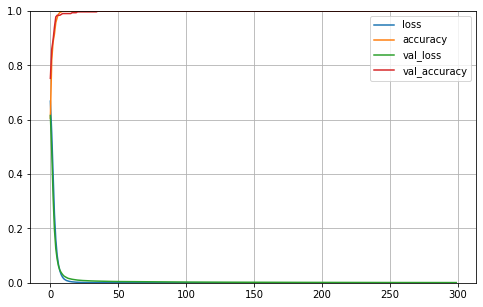

In [230]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [231]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 4ms/step - loss: 3.9344e-04 - accuracy: 1.0000


[0.0003934435953851789, 1.0]

In [232]:
X_new = X_test
y_pred = np.round(model.predict(X_new))

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[219   0]
 [  0 206]]


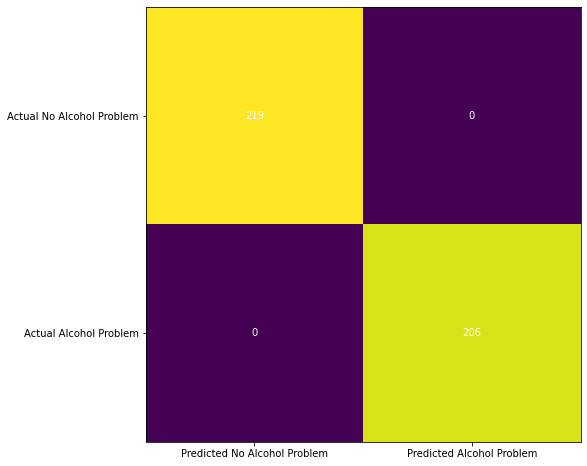

In [233]:
X_new = X_test
y_pred = np.round(model.predict(X_new))

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted No Alcohol Problem', 'Predicted Alcohol Problem'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No Alcohol Problem', 'Actual Alcohol Problem'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [234]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 219, 1.0: 206}